# How to make pandas go <font color='red'>slow</font>

In [2]:
pd.set_option('max_rows',12)
%matplotlib inline

In [3]:
df = pd.DataFrame(np.random.randn(10000,2),columns=list('AB'))

In [4]:
def f_baseline(df):
    return df['A']+1
    
def f_apply(df):
    return df.apply(lambda x: x['A'] + 1, axis=1)

def f_itertuples(df):
    l = []
    for row in df.itertuples():
        l.append(row[1]+1)
    return Series(l,name='A')

def f_iterrows(df):
    l = []
    for rowindex, row in df.iterrows():
        l.append(row['A']+1)
    return Series(l,name='A')

def f_index(df):
    s = df.A.copy()
    for i in range(len(s)):
        s.iloc[i] += 1
    return s

def f_index2(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i,0] + 1)
    return Series(l,name='A')


In [5]:
results = [f_baseline(df), f_itertuples(df), f_apply(df), f_iterrows(df), 
           f_index(df), f_index2(df)]

In [6]:
from itertools import imap, permutations
np.array(list(imap(lambda x: x[0].equals(x[1]), permutations(results, 2)))).all()

True

In [18]:
t = {}

In [33]:
x = %timeit -o -n 100 -r 1 f_baseline(df)
t['baseline'] = x.best

100 loops, best of 1: 76.2 µs per loop


In [35]:
x = %timeit -o f_itertuples(df)
t['itertuples'] = x.best

100 loops, best of 3: 5.95 ms per loop


In [36]:
x = %timeit -o f_apply(df)
t['apply'] = x.best

10 loops, best of 3: 106 ms per loop


In [37]:
x = %timeit -o f_iterrows(df)
t['iterrows'] = x.best

1 loops, best of 3: 231 ms per loop


In [38]:
x = %timeit -o f_index(df)
t['index'] = x.best

1 loops, best of 3: 748 ms per loop


In [39]:
x = %timeit -o f_index2(df)
t['index2'] = x.best

1 loops, best of 3: 1.06 s per loop


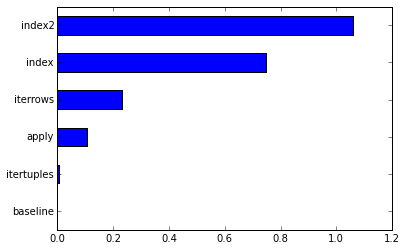

In [41]:
s = Series(t).sort_values(ascending=True)
s.plot(kind='barh')